In [1]:
versioninfo()

Julia Version 1.8.5
Commit 17cfb8e65ea (2023-01-08 06:45 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 12 × Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, skylake)
  Threads: 1 on 12 virtual cores


## 12-3. 実例：ネット上に公開されているデータの読み込みと簡単な解析

※ 本文とは環境等を少し変えています（コードはほぼ同一です）  
※ `Chapter12-1..ipynb` を一通り実行済、という前提となります。

In [2]:
]activate stats_wk

  Activating project at `/path/to/JuliaBook2023Samples/notebooks/Chapter12/stats_wk`


### コード12-17. URL を指定した CSV の読み込み例

In [3]:
using DataFrames, CSV, HTTP

In [4]:
url = "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv";

In [5]:
df = CSV.read(HTTP.request("GET", url).body, DataFrame; dateformat="y/m/d")

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima
,Date,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2020-01-16,1,0,0,0,0,0,0,0
2,2020-01-17,0,0,0,0,0,0,0,0
3,2020-01-18,0,0,0,0,0,0,0,0
4,2020-01-19,0,0,0,0,0,0,0,0
5,2020-01-20,0,0,0,0,0,0,0,0
6,2020-01-21,0,0,0,0,0,0,0,0
7,2020-01-22,0,0,0,0,0,0,0,0
8,2020-01-23,0,0,0,0,0,0,0,0
9,2020-01-24,1,0,0,0,0,0,0,0


### コード12-18. 日付の範囲でデータフレームを抽出

In [6]:
using Dates

In [7]:
dts2021d = Date(2021, 4, 1):Day(1):Date(2022, 3, 31)

Date("2021-04-01"):Day(1):Date("2022-03-31")

In [8]:
df2021d = df[df[!, :Date] .∈ Ref(dts2021d), :]

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima
,Date,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2021-04-01,2598,57,8,25,133,2,24,22
2,2021-04-02,2742,57,19,27,116,3,23,34
3,2021-04-03,2755,66,12,14,136,13,17,28
4,2021-04-04,2459,53,10,17,80,0,21,21
5,2021-04-05,1553,71,6,1,55,0,19,29
6,2021-04-06,2652,63,22,8,103,2,25,21
7,2021-04-07,3459,72,11,9,121,8,29,45
8,2021-04-08,3455,79,12,10,87,8,23,22
9,2021-04-09,3511,83,13,5,121,1,24,53


### コード12-19. ALL列（全国の数）のプロット(1)：そのままプロット

In [9]:
using Plots, StatsPlots

In [10]:
ENV["GKS_ENCODING"] = "utf8";

In [11]:
gr();

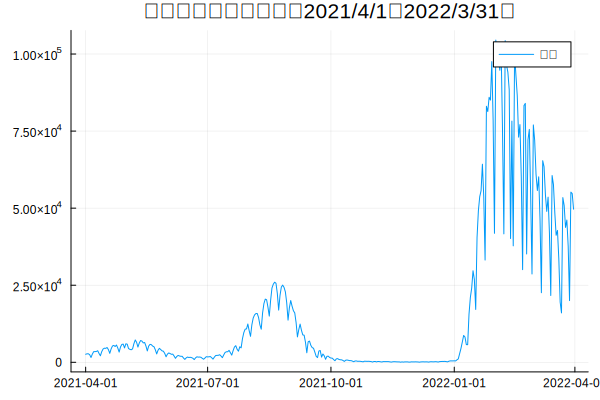

In [12]:
@df df2021d plot(:Date, :ALL, label="日別  ",
    title="全国の新規陽性者数（2021/4/1～2022/3/31）", fontfamily="sans-serif-roman")

### コード12-20. ALL列（全国の数）のプロット(2)：スムース化結果重ね合わせ

In [ ]:
# `using Plots` ～ `gr()` 略（以下同）

In [13]:
using Loess  # 要：事前に `]add Loess`

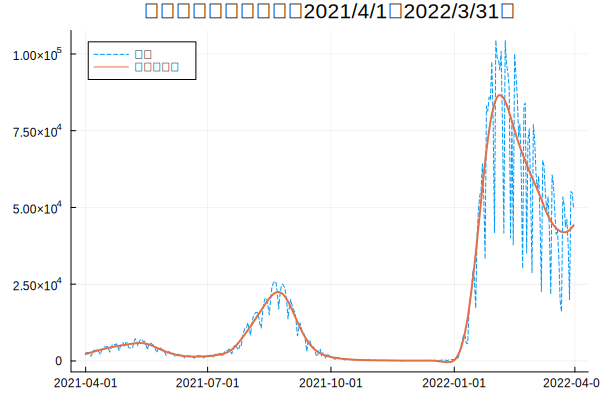

In [14]:
plt_all_2021d = @df df2021d plot(:Date, :ALL, ls=:dash, label="日別  ", legend=:topleft,
    title="全国の新規陽性者数（2021/4/1～2022/3/31）", fontfamily="sans-serif-roman");

model = loess(1:nrow(df2021d), df2021d.ALL, span=0.15);

vs = Loess.predict(model, Float64.(1:nrow(df2021d)));

@df df2021d plot!(plt_all_2021d, :Date, vs, w=2, label="スムース化     ")

### コード12-21. 相関分析の例：相関係数算出、可視化

In [15]:
using Statistics

In [16]:
@df df2021d cor(:Hokkaido, :Okinawa)

0.6011829793652694

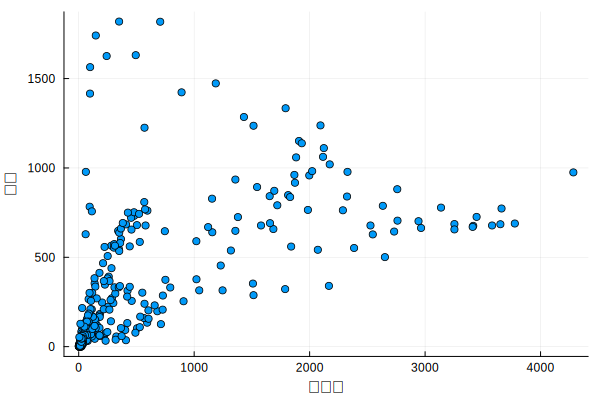

In [17]:
@df df2021d scatter(:Hokkaido, :Okinawa,
    legend=false, xlabel="北海道", ylabel="沖縄", fontfamily="sans-serif-roman")